In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import datetime
import unidecode
import pprint
from pprint import pprint
from termcolor import colored
import warnings
import gensim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
#from lightgbm import LGBMClassifier

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
warnings.simplefilter('ignore')

In [6]:
# Import data which is in two different datasets - a training dataset and a testing one.
data = pd.read_csv("/Users/lixingxin/Downloads/beer_data_set.csv")

In [7]:
data.head(10)

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218
5,Sleigh'r Dark Doüble Alt Ale,256,Altbier,8,Ninkasi Brewing Company,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,3.78,25,50,...,51,26,44,45,9,1,11,51,20,95
6,Sticke,257,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,6.0,4.10,25,50,...,45,13,46,62,25,1,34,60,4,103
7,Okto Festival Ale,258,Altbier,8,Widmer Brothers Brewing Company,Notes:Classified as a German Altbier by the Wi...,5.3,3.46,25,50,...,40,3,40,58,29,0,36,54,8,97
8,Southampton Altbier,259,Altbier,8,Southampton Publick House,Notes:,5.0,3.60,25,50,...,49,5,37,73,22,0,21,37,4,98
9,Copper,260,Altbier,8,The Olde Mecklenburg Brewery,"Notes:OMB’s flagship, Copper, is an authentic ...",4.8,4.10,25,50,...,35,4,38,39,13,1,8,60,16,97


In [8]:
# Dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [9]:
data.columns

Index(['Name', 'key', 'Style', 'Style Key', 'Brewery', 'Description', 'ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'],
      dtype='object')

In [10]:
data.describe()

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5558.000000,5558.000000,5558.00000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000
mean,2779.500000,64.449082,6.63373,3.760239,20.715545,38.452321,15.938647,42.746132,15.975171,34.316121,53.629723,34.610291,1.314142,39.378553,38.414538,17.584023,68.591400
std,1604.600729,35.814930,2.52166,0.442951,13.736873,22.184524,11.624254,28.589959,18.268342,27.118100,35.866101,39.850228,3.874110,36.652293,31.912843,23.973879,44.600385
min,1.000000,2.000000,0.00000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1390.250000,34.000000,5.00000,3.590000,10.000000,25.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,2779.500000,64.000000,6.00000,3.820000,20.000000,35.000000,14.000000,38.000000,10.000000,29.000000,49.500000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,4168.750000,95.000000,7.90000,4.040000,25.000000,45.000000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,61.750000,56.000000,22.000000,99.000000
max,5558.000000,126.000000,57.50000,4.830000,65.000000,100.000000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


In [27]:
data.isnull().sum()

Name           2
key            0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

<AxesSubplot:>

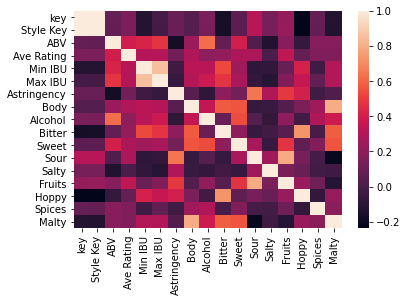

In [28]:
sns.heatmap(data.corr())

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

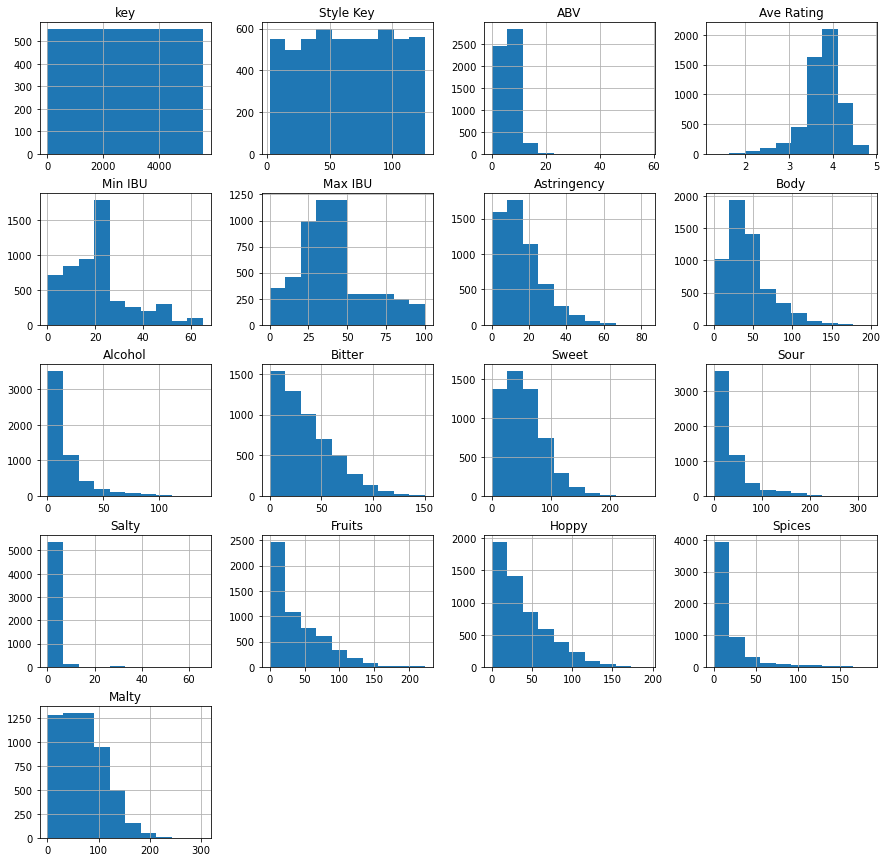

In [29]:
data.hist(figsize=(15,15))

In [19]:
# Change abstract data to a list as easier to work with

data1 = data['Description'].values.tolist()

# Note 'pprint' is just a more visually appealing version of print - standing for 'pretty print'

pprint(data1[:3])

['Notes:Richly malty and long on the palate, with just enough hop backing to '
 'make this beautiful amber colored "alt" style beer notably well balanced.\t',
 'Notes:This malty, full-bodied double alt is also known as “Stickebier” – '
 'German slang for “secret brew”. Long Trail Double Bag was originally offered '
 'only in our brewery taproom as a special treat to our visitors. With an '
 'alcohol content of 7.2%, please indulge in moderation. The Long Trail '
 'Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of '
 'the Year” in 2001. Malt Advocate is a national magazine devoted to '
 '“expanding the boundaries of fine drinks”. Their panel of judges likes to '
 'keep things simple, and therefore of thousands of eligible competitors they '
 'award only two categories: “Imported” and “Domestic”. It is a great honor to '
 'receive this recognition.33 IBU\t',
 'Notes:Long Trail Ale is a full-bodied amber ale modeled after the '
 '“Alt-biers” of Düsseldorf, Germany

In [20]:
# now a big block of basic text pre-processing
# this code will work with any text, and is a recommended starting point for text pre-processing

# I've included a timer here, to get an idea of how long it takes to process
# Note: this timer has an end-line at end of the code

start = datetime.datetime.now()

data2 = []

for review in range(0, len(data1)):
    
    # Remove all the special characters
    p_data = re.sub(r'\W', ' ', str(data1[review]))
    p_data = unidecode.unidecode(p_data)

    # remove all single characters
    p_data = re.sub(r'\s+[a-zA-Z]\s+', ' ', p_data)
    p_data = re.sub(r'\^[a-zA-Z]\s+', ' ', p_data) 
    
    # remove all numbers
    p_data = re.sub(r'\d+','', p_data) 

    # substitute multiple white spaces with single space
    p_data = re.sub(r'\s+', ' ', p_data, flags=re.I)

    # Remove prefixed 'b'
    p_data = re.sub(r'^b\s+', '', p_data)
    

    data2.append(p_data)
    
    
print('Basic pre-processing of dataset took %s' % str(datetime.datetime.now() - start))

pprint(data2[:3])

Basic pre-processing of dataset took 0:00:00.287268
['Notes Richly malty and long on the palate with just enough hop backing to '
 'make this beautiful amber colored alt style beer notably well balanced ',
 'Notes This malty full bodied double alt is also known as Stickebier German '
 'slang for secret brew Long Trail Double Bag was originally offered only in '
 'our brewery taproom as special treat to our visitors With an alcohol content '
 'of please indulge in moderation The Long Trail Brewing Company is proud to '
 'have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is '
 'national magazine devoted to expanding the boundaries of fine drinks Their '
 'panel of judges likes to keep things simple and therefore of thousands of '
 'eligible competitors they award only two categories Imported and Domestic It '
 'is great honor to receive this recognition IBU ',
 'Notes Long Trail Ale is full bodied amber ale modeled after the Alt biers of '
 'Dusseldorf Germany Our top

In [24]:
# Pre-processing: Change tweets to bag-of-words

def sent_to_words(tweets):
    for tweet in tweets:
        yield(gensim.utils.simple_preprocess(str(tweet), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data2))

count = sum([len(tweet) for tweet in data_words])
print('Total number of terms across all tweets is: ', count)

print(data_words[:3])

Total number of terms across all tweets is:  183418
[['notes', 'richly', 'malty', 'and', 'long', 'on', 'the', 'palate', 'with', 'just', 'enough', 'hop', 'backing', 'to', 'make', 'this', 'beautiful', 'amber', 'colored', 'alt', 'style', 'beer', 'notably', 'well', 'balanced'], ['notes', 'this', 'malty', 'full', 'bodied', 'double', 'alt', 'is', 'also', 'known', 'as', 'stickebier', 'german', 'slang', 'for', 'secret', 'brew', 'long', 'trail', 'double', 'bag', 'was', 'originally', 'offered', 'only', 'in', 'our', 'brewery', 'taproom', 'as', 'special', 'treat', 'to', 'our', 'visitors', 'with', 'an', 'alcohol', 'content', 'of', 'please', 'indulge', 'in', 'moderation', 'the', 'long', 'trail', 'brewing', 'company', 'is', 'proud', 'to', 'have', 'double', 'bag', 'named', 'malt', 'advocate', 'beer', 'of', 'the', 'year', 'in', 'malt', 'advocate', 'is', 'national', 'magazine', 'devoted', 'to', 'expanding', 'the', 'boundaries', 'of', 'fine', 'drinks', 'their', 'panel', 'of', 'judges', 'likes', 'to', 'ke

In [30]:
# PCA test
data3=data.drop(['Name', 'Style','Brewery','Description','key'], axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(data3)

PCA(n_components=4)

In [31]:
data3_2d = pca.transform(data3)

data3_2d = pd.DataFrame(data3_2d)
data3_2d.index = data3.index
data3_2d.columns = ['PC1','PC2','PC3','PC4']
data3_2d.head()

,PC1,PC2,PC3,PC4
0,43.200010,-25.929448,36.610644,38.996686
1,18.460091,-42.145213,18.356551,38.504962
2,-6.082356,-50.803273,44.602320,24.401668
3,70.939620,-22.606750,9.835968,55.692729
4,147.231482,-62.227691,-11.970197,50.067027


In [32]:
pca.explained_variance_ratio_

array([0.3222807 , 0.2691676 , 0.13550357, 0.08333235])

In [35]:
components=pd.DataFrame(pca.components_)
components.columns=data3.columns
components.index=['PCA1','PCA2','PCA3','PCA4']
components

,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
PCA1,-0.054151,0.013047,0.002222,0.108298,0.176662,0.028953,0.391849,0.143723,0.310008,0.428098,0.008604,-0.002030,0.115311,0.217905,0.087776,0.656489
PCA2,0.290863,0.005421,0.002378,-0.011894,0.004553,0.113530,-0.047000,0.045202,-0.061271,0.234619,0.661296,0.014298,0.591806,0.053890,0.020552,-0.219506
PCA3,-0.497355,-0.012677,-0.000343,0.104481,0.121219,0.095088,-0.159500,-0.149407,0.334833,-0.250495,0.099713,0.005505,0.131188,0.639226,-0.169060,-0.175578
PCA4,-0.769930,0.006310,-0.000961,-0.080517,-0.157521,-0.034281,-0.096516,0.051710,-0.315318,0.396029,0.031491,-0.014453,0.167229,-0.274997,0.038454,-0.013204


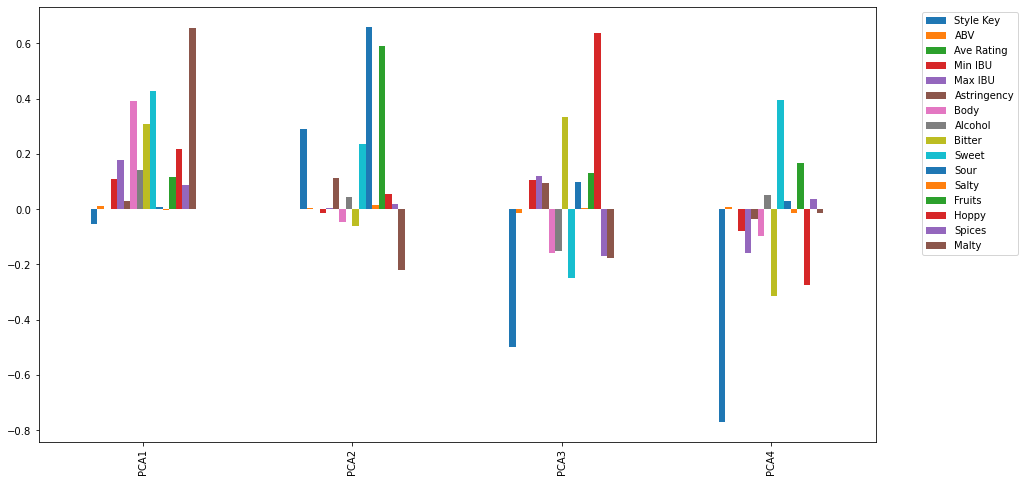

In [36]:
components.plot.bar(figsize=(15,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [37]:
from sklearn.cluster import KMeans   
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(data3)

data3_2d['cluster'] = pd.Series(clusters.labels_, index=data3_2d.index)

<AxesSubplot:xlabel='PC2', ylabel='PC1'>

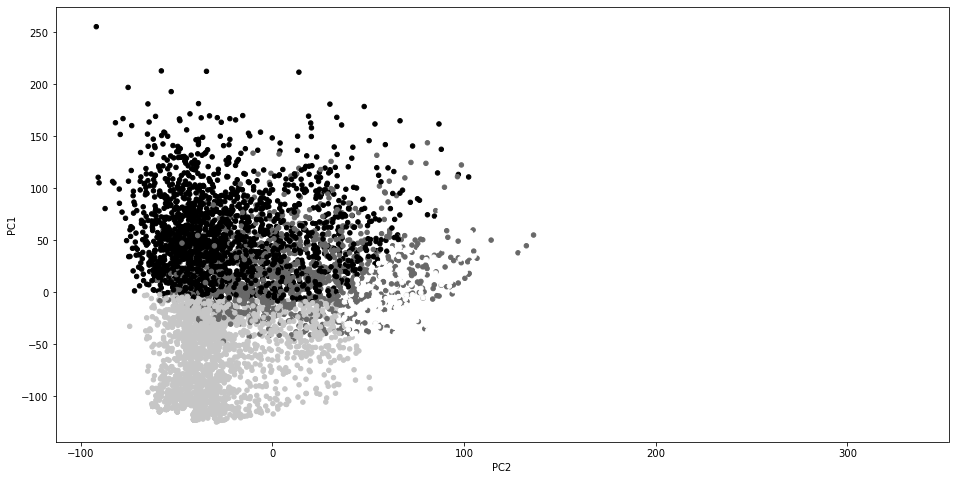

In [39]:
data3_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=data3_2d.cluster.astype(np.float),
        figsize=(16,8))

In [40]:
data3['cluster']=data3_2d['cluster']
data3

,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,cluster
0,8,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111,3
1,8,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84,3
2,8,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62,2
3,8,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119,3
4,8,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,17,6.8,3.59,35,50,8,44,24,19,52,21,0,26,21,96,77,3
5554,17,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104,2
5555,17,7.5,3.76,35,50,11,36,50,70,72,59,0,81,110,18,73,2
5556,17,8.0,3.61,35,50,6,64,30,57,78,15,1,28,57,23,129,3


<AxesSubplot:ylabel='cluster'>

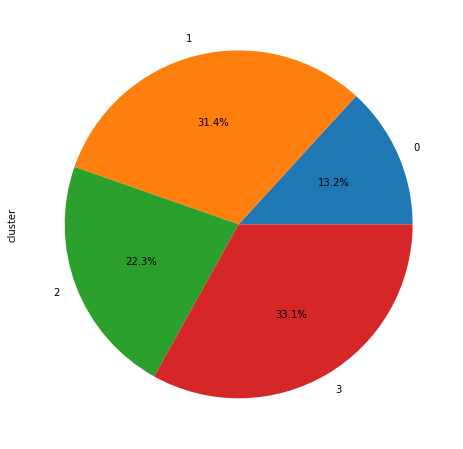

In [41]:
data3.groupby('cluster')['cluster'].count().plot.pie(figsize=(8,8),autopct="%.1f%%")

In [42]:
data3.groupby('cluster').mean()

,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
cluster,,,,,,,,,,,,,,,,
0,102.320163,6.657330,3.974305,12.621253,27.626703,28.602180,35.408719,16.038147,16.433243,73.719346,112.738420,3.407357,96.960490,26.667575,18.566757,39.070845
1,63.236978,5.860916,3.501505,13.865484,27.295363,9.401832,19.196909,7.677733,13.556382,21.657699,12.612479,0.779622,15.416142,17.793360,13.042358,32.407556
2,49.437450,6.347054,3.825311,29.297821,50.882970,22.380145,39.725585,12.916868,58.563358,47.702986,42.232446,1.788539,51.912026,83.109766,12.837772,67.820823
3,60.596844,7.552106,3.876812,24.673558,45.000544,12.752448,70.095756,25.898259,44.844396,79.991295,19.180631,0.666485,30.710555,32.576714,24.707835,115.292165
